# Analysis of Historical Windspeeds in Ireland

Downloading data in the command line using ``wget -O`` from [data.gov.ie](https://data.gov.ie/organization/meteireann?q=wind&sort=score+desc%2C+metadata_modified+desc)

I chose 5 dataframes to represent regions North, South, East, West and the Midlands. These being: Malin head, Roches Point, Dublin airport, Belmullet and Mullingar, respectively.

The aim is for the analysis to be as comprehensive as possible whilst retaining manageability. 

In [162]:
# import necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Inspecting the Data sets

Before I begin I will need to review each data set as there are sometimes different columns and different start dates for each. I will also need to inspect for missing values and clean up the data before creating my analysis.

### Roches Point (South)

In [163]:
filepath1 = r"C:\Users\joann\Desktop\PFDA-project\dataframes\roches_point.csv"
df_south = pd.read_csv(filepath1, skiprows= 24)
df_south.head()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ddhm,ind.5,hg,soil,pe,evap,smd_wd,smd_md,smd_pd,glorad
0,01-dec-1955,0,10.9,0,5.9,,,0,9.1,1004.2,...,170,0,24,,,,,,,
1,02-dec-1955,0,12.1,0,4.0,,,0,0.9,1011.2,...,210,0,32,,,,,,,
2,03-dec-1955,0,10.7,0,6.4,,,3,0.0,1018.2,...,270,0,21,,,,,,,
3,04-dec-1955,0,11.6,0,4.8,,,0,1.5,1026.6,...,210,0,23,,,,,,,
4,05-dec-1955,0,11.8,0,10.7,,,0,0.8,1023.2,...,220,0,32,,,,,,,


In [164]:
df_south.tail()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ddhm,ind.5,hg,soil,pe,evap,smd_wd,smd_md,smd_pd,glorad
21431,26-nov-2024,0,7.5,0,2.3,0,-1.0,0,0.4,1006.9,...,40,0,15,4.643,0.3,0.3,0.4,0.4,-8.6,332
21432,27-nov-2024,0,10.0,0,3.7,0,0.4,0,0.0,1011.5,...,120,0,22,4.903,0.5,0.6,1.0,1.0,-7.6,430
21433,28-nov-2024,0,12.6,0,9.6,0,1.4,0,4.2,1013.8,...,120,0,37,8.309,1.2,1.6,0.0,-2.1,-10.0,51
21434,29-nov-2024,0,13.0,0,12.3,0,8.2,0,10.0,1008.6,...,140,0,37,11.043,0.4,0.7,0.0,-9.6,-10.0,93
21435,30-nov-2024,0,13.2,0,12.1,0,11.7,0,7.4,1006.9,...,160,0,38,11.818,0.3,0.5,0.0,-7.1,-10.0,114


#### Drop Unnecessary Columns
[Very Helpful Website](https://www.statology.org/pandas-drop-columns-not-in-list/)

In [165]:
keep_cols = ["date" , "rain", "maxtp",  "mintp", "cbl", "wdsp", "hm", "ddhm", "hg"]
df_new_south = df_south[df_south.columns.intersection(keep_cols)]
df_new_south.head()

,date,maxtp,mintp,rain,cbl,wdsp,hm,ddhm,hg
0,01-dec-1955,10.9,5.9,9.1,1004.2,11.5,18,170,24
1,02-dec-1955,12.1,4.0,0.9,1011.2,12.1,23,210,32
2,03-dec-1955,10.7,6.4,0.0,1018.2,8.0,16,270,21
3,04-dec-1955,11.6,4.8,1.5,1026.6,6.3,16,210,23
4,05-dec-1955,11.8,10.7,0.8,1023.2,16.5,23,220,32


In [166]:
df_new_south.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21436 entries, 0 to 21435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    21436 non-null  object
 1   maxtp   21436 non-null  object
 2   mintp   21436 non-null  object
 3   rain    21436 non-null  object
 4   cbl     21436 non-null  object
 5   wdsp    21436 non-null  object
 6   hm      21436 non-null  object
 7   ddhm    21436 non-null  object
 8   hg      21436 non-null  object
dtypes: object(9)
memory usage: 1.5+ MB


In [167]:
df_new_south.describe()

,date,maxtp,mintp,rain,cbl,wdsp,hm,ddhm,hg
count,21436,21436,21436,21436,21436,21436,21436,21436,21436
unique,21436,268,227,370,707,339,61,42,85
top,01-dec-1955,11.2,7.4,0.0,1014.8,11.0,16,,23
freq,1,244,227,8979,120,210,1120,2539,795


In [168]:
# Count of missing values in each column
print(df_new_south.isnull().sum())  

date     0
maxtp    0
mintp    0
rain     0
cbl      0
wdsp     0
hm       0
ddhm     0
hg       0
dtype: int64


#### Adding Identifying Column
Adding an extra column so that once the data frames are concatenated they can be identified seperately.

In [169]:
df_new_south.loc[:,'Station'] = 'South'

C:\Users\joann\AppData\Local\Temp\ipykernel_4352\1682085699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_south.loc[:,'Station'] = 'South'


### Belmullet (West)

In [170]:
filepath2 = r"C:\Users\joann\Desktop\PFDA-project\dataframes\belmullet_mayo.csv"
df_west = pd.read_csv(filepath2, skiprows= 24)
df_west.head()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ind.5,hg,sun,glorad,soil,pe,evap,smd_wd,smd_md,smd_pd
0,17-sep-1956,0,16.6,0,8.6,0,7.2,2,0.0,1022.6,...,0,18,,,12.725,1.3,1.9,,,
1,18-sep-1956,0,17.5,0,11.6,0,11.0,2,0.0,1017.9,...,0,14,,,14.650,1.4,1.9,,,
2,19-sep-1956,0,17.0,0,12.7,0,11.8,0,0.0,1012.9,...,0,26,,,14.600,1.1,1.6,,,
3,20-sep-1956,0,19.2,0,13.4,0,12.6,0,1.0,1005.5,...,0,38,,,14.975,1.8,2.5,,,
4,21-sep-1956,0,17.4,0,12.3,0,11.7,0,0.6,998.7,...,0,36,,,14.650,1.6,2.3,,,


In [171]:
df_west.tail()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ind.5,hg,sun,glorad,soil,pe,evap,smd_wd,smd_md,smd_pd
24907,26-nov-2024,0,7.9,0,0.2,0,-0.3,0,1.3,1009.7,...,0,15,1.9,224,5.627,0.2,0.3,0.0,-1.1,-10.0
24908,27-nov-2024,0,8.7,0,-1.6,0,-4.8,0,0.0,1016.7,...,0,13,4.5,352,3.646,0.0,0.1,0.0,0.0,-9.5
24909,28-nov-2024,0,12.7,0,2.1,0,-3.0,0,7.4,1014.3,...,0,35,0.0,40,5.120,0.6,0.8,0.0,-6.8,-10.0
24910,29-nov-2024,0,12.7,0,9.8,0,5.5,0,8.8,1006.8,...,0,26,0.0,32,8.690,0.6,0.8,0.0,-8.2,-10.0
24911,30-nov-2024,0,13.8,0,11.3,0,9.9,0,2.2,1003.6,...,0,46,0.1,96,9.898,0.8,1.0,0.0,-1.4,-10.0


#### Drop Unnecessary Columns

In [172]:
keep_cols = ["date" , "rain", "maxtp",  "mintp", "cbl", "wdsp", "hm", "ddhm", "hg"]
df_new_west = df_west[df_west.columns.intersection(keep_cols)]
df_new_west.head()

,date,maxtp,mintp,rain,cbl,wdsp,hm,ddhm,hg
0,17-sep-1956,16.6,8.6,0.0,1022.6,7.4,13,100,18
1,18-sep-1956,17.5,11.6,0.0,1017.9,8.0,13,170,14
2,19-sep-1956,17.0,12.7,0.0,1012.9,11.4,18,150,26
3,20-sep-1956,19.2,13.4,1.0,1005.5,17.5,27,210,38
4,21-sep-1956,17.4,12.3,0.6,998.7,17.4,27,170,36


In [173]:
df_new_west.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24912 entries, 0 to 24911
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    24912 non-null  object 
 1   maxtp   24912 non-null  float64
 2   mintp   24912 non-null  float64
 3   rain    24912 non-null  float64
 4   cbl     24912 non-null  object 
 5   wdsp    24912 non-null  float64
 6   hm      24912 non-null  object 
 7   ddhm    24912 non-null  object 
 8   hg      24912 non-null  object 
dtypes: float64(4), object(5)
memory usage: 1.7+ MB


In [174]:
df_new_west.describe()

,maxtp,mintp,rain,wdsp
count,24912.000000,24912.000000,24912.000000,24912.000000
mean,12.931214,7.254813,3.288929,12.695087
std,3.935487,3.988386,4.922051,5.751210
min,-1.100000,-8.100000,0.000000,0.000000
25%,10.100000,4.400000,0.000000,8.400000
50%,12.700000,7.500000,1.300000,12.000000
75%,15.900000,10.400000,4.600000,16.300000
max,29.900000,19.300000,67.800000,44.700000


In [175]:
print(df_new_west.isnull().sum())  

date     0
maxtp    0
mintp    0
rain     0
cbl      0
wdsp     0
hm       0
ddhm     0
hg       0
dtype: int64


#### Adding Identifying Column

In [176]:
df_new_west.loc[:,'Station'] = 'West'

C:\Users\joann\AppData\Local\Temp\ipykernel_4352\1980096657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_west.loc[:,'Station'] = 'West'


### Malin (North)

In [177]:
filepath3= r"C:\Users\joann\Desktop\PFDA-project\dataframes\malin.csv"
df_north = pd.read_csv(filepath3, skiprows= 24)
df_north.head()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ind.5,hg,sun,glorad,soil,pe,evap,smd_wd,smd_md,smd_pd
0,01-may-1955,0,9.4,0,6.9,0,3.8,0,7.4,996.2,...,2,48,,,,1.0,1.9,,,
1,02-may-1955,0,11.2,0,5.7,0,5.9,3,0.0,997.1,...,0,31,,,12.300,1.9,3.6,,,
2,03-may-1955,0,13.1,0,4.3,0,0.6,0,6.6,989.6,...,0,48,,,9.200,1.4,2.4,,,
3,04-may-1955,0,12.8,0,7.8,0,6.1,0,4.4,978.3,...,0,41,,,9.625,2.0,3.6,,,
4,05-may-1955,0,13.2,0,8.1,0,6.6,0,2.7,990.3,...,0,34,,,10.775,2.0,3.4,,,


In [178]:
df_north.tail()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ind.5,hg,sun,glorad,soil,pe,evap,smd_wd,smd_md,smd_pd
25412,26-nov-2024,0,8.2,0,2.9,0,2.7,0,6.2,1006.7,...,0,29,1.2,199,6.132,0.4,0.4,0.0,-5.8,-10.0
25413,27-nov-2024,0,6.5,0,1.4,0,-1.0,0,1.0,1016.5,...,0,14,1.0,209,4.949,0.2,0.2,0.0,-0.8,-10.0
25414,28-nov-2024,0,12.1,0,1.9,0,-1.3,0,2.2,1015.9,...,0,45,0.0,85,4.588,0.8,1.1,0.0,-1.4,-10.0
25415,29-nov-2024,0,13.9,0,11.8,0,2.2,0,0.7,1008.2,...,0,38,0.0,30,9.148,1.0,1.4,0.3,0.3,-9.2
25416,30-nov-2024,0,15.4,0,11.5,0,9.1,0,0.1,1003.8,...,0,40,0.6,153,10.047,1.1,1.3,1.3,1.3,-7.7


#### Drop Unneccesary Columns

In [179]:
keep_cols = ["date" , "rain", "maxtp",  "mintp", "cbl", "wdsp", "hm", "ddhm", "hg"]
df_new_north = df_north[df_north.columns.intersection(keep_cols)]
df_new_north.head()

,date,maxtp,mintp,rain,cbl,wdsp,hm,ddhm,hg
0,01-may-1955,9.4,6.9,7.4,996.2,19.2,34,70,48
1,02-may-1955,11.2,5.7,0.0,997.1,14.2,24,310,31
2,03-may-1955,13.1,4.3,6.6,989.6,14.8,30,130,48
3,04-may-1955,12.8,7.8,4.4,978.3,19.9,27,230,41
4,05-may-1955,13.2,8.1,2.7,990.3,16.0,24,240,34


In [180]:
df_new_north.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25417 entries, 0 to 25416
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    25417 non-null  object 
 1   maxtp   25417 non-null  float64
 2   mintp   25417 non-null  float64
 3   rain    25417 non-null  float64
 4   cbl     25417 non-null  float64
 5   wdsp    25417 non-null  object 
 6   hm      25417 non-null  object 
 7   ddhm    25417 non-null  object 
 8   hg      25417 non-null  object 
dtypes: float64(4), object(5)
memory usage: 1.7+ MB


In [181]:
df_new_north.describe()

,maxtp,mintp,rain,cbl
count,25417.000000,25417.000000,25417.000000,25417.000000
mean,12.128717,7.252481,2.992769,1008.928394
std,3.993466,3.850467,4.642094,12.484083
min,-0.800000,-6.200000,0.000000,953.600000
25%,9.100000,4.300000,0.000000,1001.200000
50%,12.000000,7.400000,1.000000,1009.900000
75%,15.100000,10.400000,4.200000,1017.800000
max,27.100000,18.400000,80.600000,1046.400000


In [182]:
print(df_new_north.isnull().sum()) 

date     0
maxtp    0
mintp    0
rain     0
cbl      0
wdsp     0
hm       0
ddhm     0
hg       0
dtype: int64


#### Adding Identifying Column

In [183]:
df_new_north.loc[:,'Station'] = 'North'

C:\Users\joann\AppData\Local\Temp\ipykernel_4352\2941288210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_north.loc[:,'Station'] = 'North'


### Dublin (East)

In [184]:
filepath4= r"C:\Users\joann\Desktop\PFDA-project\dataframes\dublin.csv"
df_east = pd.read_csv(filepath4, skiprows= 24)
df_east.head()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
0,01-jan-1942,0,9.7,0,6.8,0,4.7,2,0.0,1020.3,...,,0.0,0,,,1.1,1.4,,,
1,02-jan-1942,0,9.9,0,7.9,0,6.7,0,0.1,1016.2,...,,0.0,0,,,0.7,0.9,,,
2,03-jan-1942,0,11.2,0,8.9,0,7.2,0,1.5,1006.8,...,,0.1,0,,,0.5,0.6,,,
3,04-jan-1942,0,9.2,0,2.7,0,3.4,0,3.5,1001.5,...,,0.6,0,,,0.6,0.7,,,
4,05-jan-1942,0,3.5,1,-0.8,0,0.0,0,0.6,1013.4,...,,3.4,0,,,0.6,0.7,,,


In [185]:
df_east.tail()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
30280,26-nov-2024,0,7.8,1,-1.9,1,-0.4,3,0.0,1000.8,...,16,7.3,0,,3.625,0.2,0.3,0.8,0.8,-7.8
30281,27-nov-2024,0,6.2,1,-3.3,1,-6.8,3,0.0,1008.4,...,13,6.7,0,,2.375,0.1,0.1,0.9,0.9,-7.4
30282,28-nov-2024,0,11.3,1,-4.1,1,-7.9,0,0.5,1011.0,...,33,0.0,0,,3.675,0.4,0.6,0.8,0.8,-7.0
30283,29-nov-2024,0,14.2,0,10.9,0,5.4,0,0.2,1005.1,...,28,0.0,0,,8.725,1.0,1.2,1.6,1.6,-5.9
30284,30-nov-2024,0,15.8,0,11.8,0,9.2,0,0.4,1001.8,...,31,0.8,0,,10.000,0.8,0.9,2.0,2.0,-5.2


#### Drop Unnecessary Columns

In [186]:
keep_cols = ["date" , "rain", "maxtp",  "mintp", "cbl", "wdsp", "hm", "ddhm", "hg"]
df_new_east = df_east[df_east.columns.intersection(keep_cols)]
df_new_east.head()

,date,maxtp,mintp,rain,cbl,wdsp,hm,ddhm,hg
0,01-jan-1942,9.7,6.8,0.0,1020.3,17.2,,,
1,02-jan-1942,9.9,7.9,0.1,1016.2,15.2,,,
2,03-jan-1942,11.2,8.9,1.5,1006.8,14.0,,,
3,04-jan-1942,9.2,2.7,3.5,1001.5,17.0,,,
4,05-jan-1942,3.5,-0.8,0.6,1013.4,13.0,,,


In [187]:
df_new_east.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30285 entries, 0 to 30284
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    30285 non-null  object 
 1   maxtp   30285 non-null  float64
 2   mintp   30285 non-null  float64
 3   rain    30285 non-null  float64
 4   cbl     30285 non-null  float64
 5   wdsp    30285 non-null  float64
 6   hm      30285 non-null  object 
 7   ddhm    30285 non-null  object 
 8   hg      30285 non-null  object 
dtypes: float64(5), object(4)
memory usage: 2.1+ MB


In [188]:
df_new_east.describe()

,maxtp,mintp,rain,cbl,wdsp
count,30285.000000,30285.000000,30285.000000,30285.000000,30285.000000
mean,13.072574,6.161430,2.072617,1003.481199,10.187294
std,4.906010,4.380311,4.390688,11.736406,4.595588
min,-4.700000,-12.200000,0.000000,949.600000,0.000000
25%,9.500000,2.900000,0.000000,996.200000,6.800000
50%,13.000000,6.300000,0.200000,1004.500000,9.500000
75%,16.900000,9.600000,2.200000,1011.700000,13.000000
max,29.100000,18.400000,92.600000,1037.400000,35.500000


In [189]:
print(df_new_east.isnull().sum()) 

date     0
maxtp    0
mintp    0
rain     0
cbl      0
wdsp     0
hm       0
ddhm     0
hg       0
dtype: int64


#### Adding Identifying Column

In [190]:
df_new_east.loc[:,'Station'] = 'East'

C:\Users\joann\AppData\Local\Temp\ipykernel_4352\3265036757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_east.loc[:,'Station'] = 'East'


### Mullingar (The Midlands)

In [191]:
filepath5= r"C:\Users\joann\Desktop\PFDA-project\dataframes\mullingar.csv"
df_midlands = pd.read_csv(filepath5, skiprows= 24)
df_midlands.head()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ddhm,ind.5,hg,soil,pe,evap,smd_wd,smd_md,smd_pd,glorad
0,08-nov-1973,0,13.6,0,10.6,0,8.2,0,0.6,1010.7,...,240,0,37,9.725,0.6,0.9,,,,
1,09-nov-1973,0,12.3,0,7.1,0,10.5,0,13.9,1004.2,...,230,0,36,10.175,0.4,0.7,,,,
2,10-nov-1973,0,9.8,0,2.7,0,2.8,0,1.3,1003.9,...,300,0,36,8.600,0.4,0.5,,,,
3,11-nov-1973,0,8.2,0,1.9,1,-0.2,0,0.8,1011.2,...,280,0,29,6.050,0.4,0.6,,,,
4,12-nov-1973,0,12.6,0,6.5,1,-1.5,0,5.2,1004.2,...,260,0,45,8.050,0.7,1.0,,,,


In [192]:
df_midlands.tail()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ddhm,ind.5,hg,soil,pe,evap,smd_wd,smd_md,smd_pd,glorad
18646,26-nov-2024,0,8.3,0,-3.0,0,-7.7,0,0.0,998.7,...,220,0,9,3.834,0.0,0.1,0.3,0.3,-8.7,427
18647,27-nov-2024,0,3.4,0,-4.1,0,-8.4,0,0.0,1006.3,...,10,0,8,3.086,0.0,0.0,0.3,0.3,-8.3,397
18648,28-nov-2024,0,11.6,0,-2.7,0,-8.3,0,1.5,1007.7,...,170,0,25,4.336,0.3,0.5,0.0,-0.9,-9.1,96
18649,29-nov-2024,0,13.2,0,10.9,0,3.3,0,2.3,1001.3,...,160,0,25,8.954,0.6,0.8,0.0,-1.7,-10.0,42
18650,30-nov-2024,0,14.3,0,10.0,0,6.2,0,4.5,998.2,...,180,0,30,9.535,0.5,0.6,0.0,-4.0,-10.0,144


#### Drop Unnecessary Columns

In [193]:
keep_cols = ["date" , "rain", "maxtp",  "mintp", "cbl", "wdsp", "hm", "ddhm", "hg"]
df_new_midlands = df_midlands[df_midlands.columns.intersection(keep_cols)]
df_new_midlands.head()

,date,maxtp,mintp,rain,cbl,wdsp,hm,ddhm,hg
0,08-nov-1973,13.6,10.6,0.6,1010.7,17.6,23,240,37
1,09-nov-1973,12.3,7.1,13.9,1004.2,14.8,21,230,36
2,10-nov-1973,9.8,2.7,1.3,1003.9,10.4,19,300,36
3,11-nov-1973,8.2,1.9,0.8,1011.2,9.3,17,280,29
4,12-nov-1973,12.6,6.5,5.2,1004.2,20.0,25,260,45


In [194]:
df_new_midlands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18651 entries, 0 to 18650
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18651 non-null  object 
 1   maxtp   18651 non-null  float64
 2   mintp   18651 non-null  float64
 3   rain    18651 non-null  float64
 4   cbl     18651 non-null  object 
 5   wdsp    18651 non-null  object 
 6   hm      18651 non-null  object 
 7   ddhm    18651 non-null  object 
 8   hg      18651 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.3+ MB


In [195]:
df_new_midlands.describe()

,maxtp,mintp,rain
count,18651.000000,18651.000000,18651.000000
mean,13.040909,5.429055,2.670575
std,5.092989,4.601677,4.599139
min,-4.900000,-14.900000,0.000000
25%,9.300000,2.000000,0.000000
50%,12.900000,5.500000,0.600000
75%,16.900000,9.000000,3.500000
max,30.400000,17.800000,71.100000


In [196]:
print(df_new_midlands.isnull().sum()) 

date     0
maxtp    0
mintp    0
rain     0
cbl      0
wdsp     0
hm       0
ddhm     0
hg       0
dtype: int64


#### Adding Identifying Column

In [197]:
df_new_midlands.loc[:, 'Station'] = 'Midlands'

C:\Users\joann\AppData\Local\Temp\ipykernel_4352\1222889200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_midlands.loc[:, 'Station'] = 'Midlands'


## Combined Dataframe
Here I will combine the dataframes using ````concat()```` this way the dataframes will be stacked on top of each other rather than merged. I found [this youtube video](https://www.youtube.com/watch?v=wzN1UyfRSWI) particularly helpful in learning how to combine dataframes. When doing my data analysis and comparing the stations, the identifying station column will be very useful.

#### Variables
- ```date``` in the format ```%d-%b-%Y``` (e.g. 01-jan-1999)

- ```maxtp``` is Maximum Air Temperature (C)

- ```mintp``` is Minimum  Air Temperature (C)

- ```rain``` is Precipitation Amount (mm)

- ```cbl``` is Mean CBL Pressure (hpa)

    - The Convective Boundary Layer (CBL) refers to the layer of our atmosphere where most of the weather we experience occurs, and how heat rising from the Earth's surface mixes with the cooler air above and affects our weather. Also related to cloud cover.

- ```wdsp``` is Mean Wind Speed (kt)

- ```hm``` is Highest ten minute mean wind speed (kt)

- ```ddhm``` is Wind Direction at max 10 min mean (deg)

- ```hg``` is Highest Gust (kt)

- ```Station```  refers to where the station is in terms of: North, South, East, West or the Midlands.

In [198]:
combined_df = pd.concat([df_new_south, df_new_east, df_new_north, df_new_west, df_new_midlands])
combined_df.to_csv("ireland.csv", index= False)
filepath2 = r"C:\Users\joann\Desktop\PFDA-project\ireland.csv"
ireland_df = pd.read_csv(filepath2)
ireland_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120701 entries, 0 to 120700
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     120701 non-null  object
 1   maxtp    120701 non-null  object
 2   mintp    120701 non-null  object
 3   rain     120701 non-null  object
 4   cbl      120701 non-null  object
 5   wdsp     120701 non-null  object
 6   hm       120701 non-null  object
 7   ddhm     120701 non-null  object
 8   hg       120701 non-null  object
 9   Station  120701 non-null  object
dtypes: object(10)
memory usage: 9.2+ MB


C:\Users\joann\AppData\Local\Temp\ipykernel_4352\1496435688.py:4: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  ireland_df = pd.read_csv(filepath2)


#### Changing the data types

The data types need to be changed in order to do analysis. The ```date``` column will need to be recognised by pandas and matplotlib as ```datetime```. And my other variables need to be recognised at ```float``` numbers. 

In [199]:
# I need to change the data type.
ireland_df["date"] = pd.to_datetime(ireland_df["date"], format="%d-%b-%Y")
ireland_df["maxtp"] = pd.to_numeric(ireland_df["maxtp"], errors="coerce")
ireland_df["mintp"] = pd.to_numeric(ireland_df["mintp"], errors="coerce")
ireland_df["rain"] = pd.to_numeric(ireland_df["rain"], errors="coerce")
ireland_df["cbl"] = pd.to_numeric(ireland_df["cbl"], errors="coerce")
ireland_df["wdsp"] = pd.to_numeric(ireland_df["wdsp"], errors="coerce")
ireland_df["hm"] = pd.to_numeric(ireland_df["hm"], errors="coerce")
ireland_df["ddhm"] = pd.to_numeric(ireland_df["ddhm"], errors="coerce")
ireland_df["hg"] = pd.to_numeric(ireland_df["hg"], errors="coerce")
ireland_df.info() # testing it works by rechecking the dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120701 entries, 0 to 120700
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     120701 non-null  datetime64[ns]
 1   maxtp    120634 non-null  float64       
 2   mintp    120634 non-null  float64       
 3   rain     120641 non-null  float64       
 4   cbl      120636 non-null  float64       
 5   wdsp     120620 non-null  float64       
 6   hm       119647 non-null  float64       
 7   ddhm     117149 non-null  float64       
 8   hg       119648 non-null  float64       
 9   Station  120701 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 9.2+ MB


#### Descriptive Statistics

Using ```describe()``` will allow me to generate descriptive statistics such as count (number of each variable entry), mean, standard deviation, the range (max and min), the first and third quartile as well as the median. It's important to note that each entry refers to the daily mean for each variable.

##### Daily

In [207]:
maxtp_stats = ireland_df.groupby("Station")["maxtp"].describe()
mintp_stats = ireland_df.groupby("Station")["mintp"].describe()
rain_stats = ireland_df.groupby("Station")["rain"].describe()
cbl_stats = ireland_df.groupby("Station")["cbl"].describe()
wdsp_stats = ireland_df.groupby("Station")["wdsp"].describe()
hm_stats = ireland_df.groupby("Station")["hm"].describe()
ddhm_stats = ireland_df.groupby("Station")["ddhm"].describe()
hg_stats = ireland_df.groupby("Station")["hg"].describe()

print(f"Maximum Air Temperature:\n{maxtp_stats}")
print(f"\nMinimum Air Temperature:\n{mintp_stats}")
print(f"\nPrecipitation Ammount (mm):\n{rain_stats}")
print(f"\nMean CBL Pressure:\n{cbl_stats}")
print(f"\nMean Windspeed (kt):\n{wdsp_stats}")
print(f"\nHighest ten minute mean wind speed (kt):\n{hm_stats}")
print(f"\nWind Direction at max 10 min mean (deg):\n{ddhm_stats}")
print(f"\nHighest Gust (kt):\n{hg_stats}")

Maximum Air Temperature:
            count       mean       std  min   25%   50%   75%   max
Station                                                            
East      30285.0  13.072574  4.906010 -4.7   9.5  13.0  16.9  29.1
Midlands  18651.0  13.040909  5.092989 -4.9   9.3  12.9  16.9  30.4
North     25417.0  12.128717  3.993466 -0.8   9.1  12.0  15.1  27.1
South     21369.0  13.169311  4.127305 -3.3  10.2  12.9  16.4  28.0
West      24912.0  12.931214  3.935487 -1.1  10.1  12.7  15.9  29.9

Minimum Air Temperature:
            count      mean       std   min  25%  50%   75%   max
Station                                                          
East      30285.0  6.161430  4.380311 -12.2  2.9  6.3   9.6  18.4
Midlands  18651.0  5.429055  4.601677 -14.9  2.0  5.5   9.0  17.8
North     25417.0  7.252481  3.850467  -6.2  4.3  7.4  10.4  18.4
South     21369.0  7.906814  3.866940  -7.2  5.0  8.1  10.9  19.0
West      24912.0  7.254813  3.988386  -8.1  4.4  7.5  10.4  19.3

Precipitat

#### Yearly Windspeed Trends Across Each Station

##### Windspeed

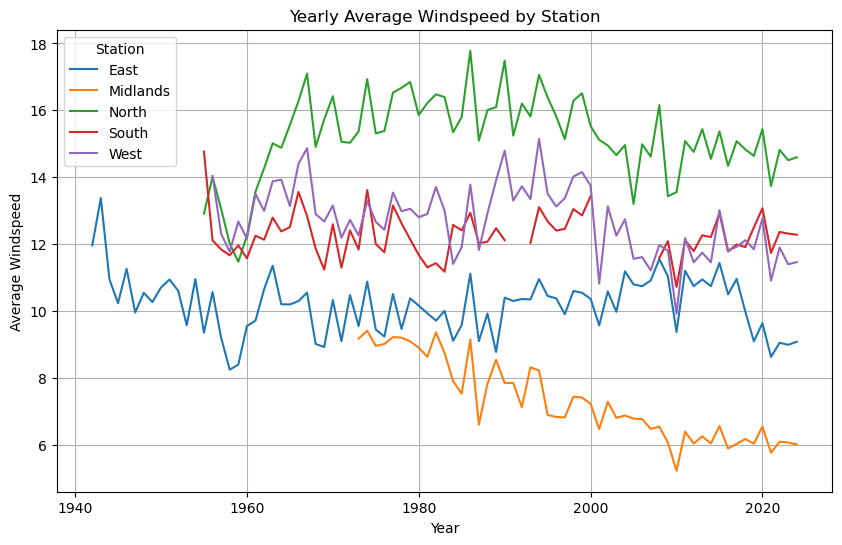

In [210]:
yearly_wdsp = ireland_df.groupby([ireland_df["date"].dt.year, "Station"])["wdsp"].mean().unstack()

plt.figure(figsize=(10,6))
yearly_wdsp.plot(ax= plt.gca())
plt.title("Yearly Average Windspeed by Station")
plt.xlabel("Year")
plt.ylabel("Average Windspeed")
plt.legend(title = "Station")
plt.grid()
plt.show()

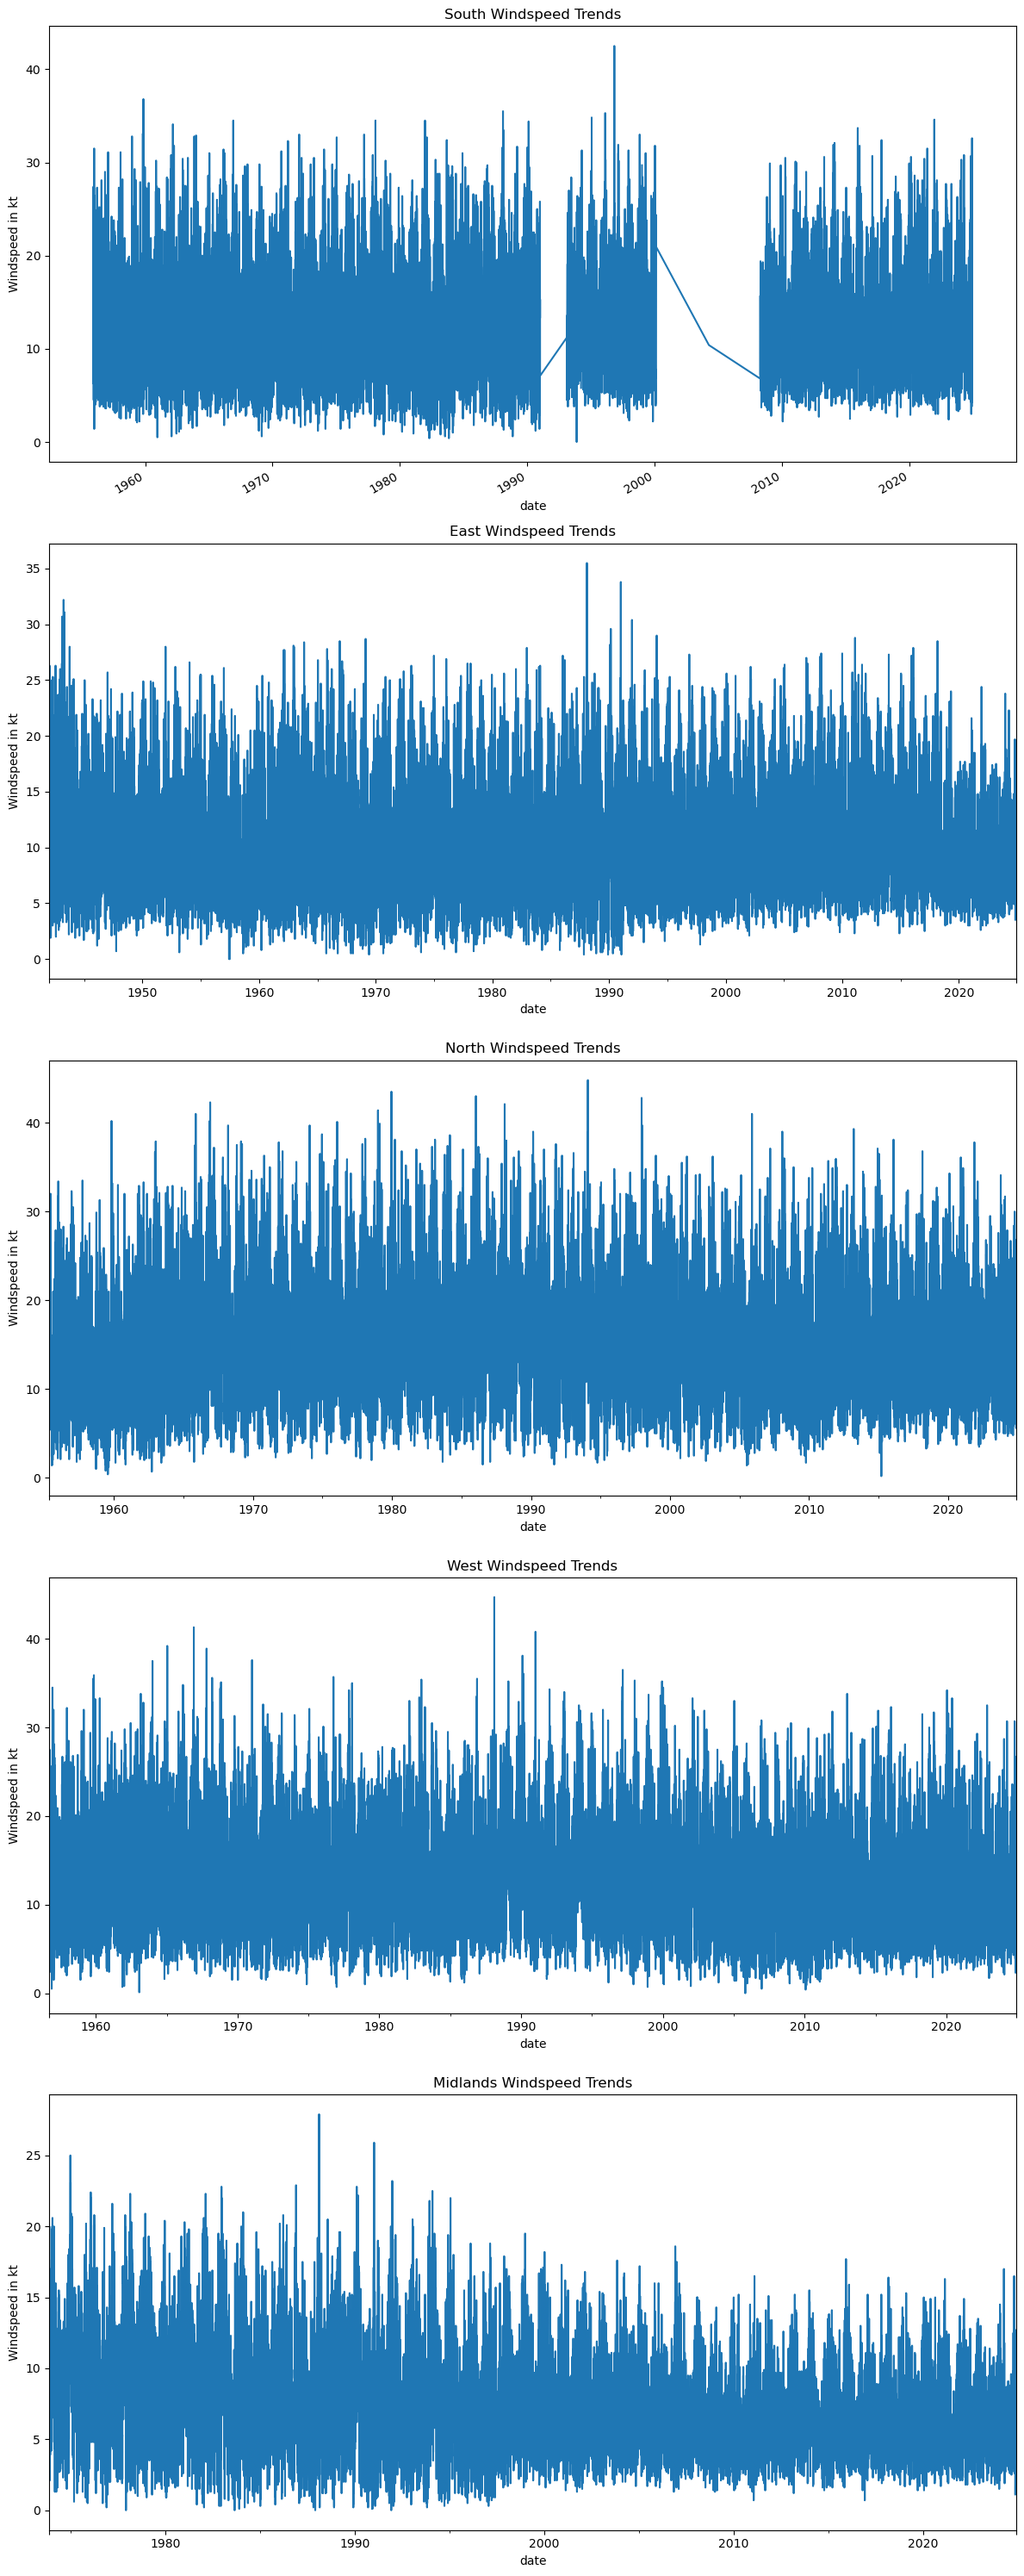

In [201]:
stations = ireland_df['Station'].unique()
fig, axes = plt.subplots(len(stations), 1, figsize=(12, len(stations)*6))

for i, station in enumerate(stations):
    station_data = ireland_df[ireland_df['Station'] == station]
    station_data.groupby('date')['wdsp'].mean().plot(ax=axes[i])
    axes[i].set_title(f'{station} Windspeed Trends')
    axes[i].set_ylabel('Windspeed in kt')

plt.tight_layout()
plt.show()

#### Seasonal Trends Across Stations

##### Windspeed

In [215]:
# Assigning seasons
def get_season(month):
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    else:
        return "Winter"

# Adding the "season" indentifying column
ireland_df["season"] = ireland_df["date"].dt.month.apply(get_season)

Using seaborn to create a heatmap that compares the average windspeed of all the Springs, Summers, Autumns and Winters at each station. The Northerly station at Malin Head is by far the windiest. Winter there has an aggregate average of 17.86 knots over a roughly 70 year period.

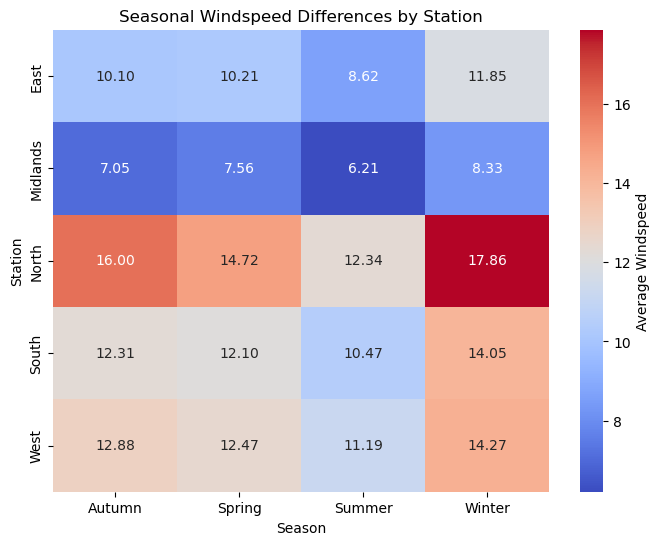

In [222]:
seasonal_data = ireland_df.groupby(["Station", "season"])["wdsp"].mean().unstack()

# Heatmap for condensed seasonal averages
plt.figure(figsize=(8, 6))
sns.heatmap(seasonal_data, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Average Windspeed'})
plt.title("Seasonal Windspeed Differences by Station")
plt.ylabel("Station")
plt.xlabel("Season")
plt.show()

#### Seasonal Trends Over Time (by Station)

##### Windspeed

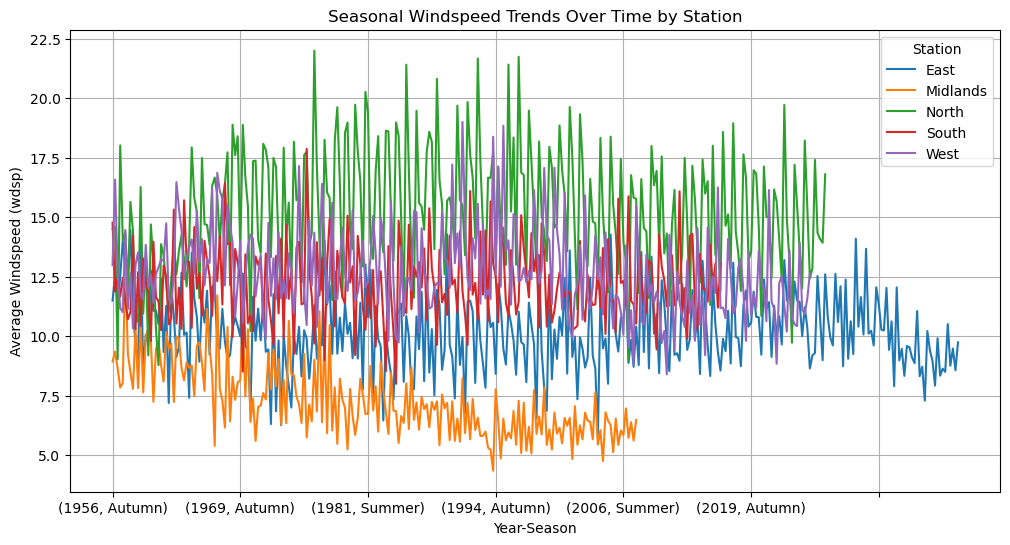

In [223]:
# groups season, year and station 
seasonal_trend_data = ireland_df.groupby(["Station", "year", "season"])["wdsp"].mean().unstack()

plt.figure(figsize=(12, 6))
for station in seasonal_trend_data.index.levels[0]:
    station_data = seasonal_trend_data.loc[station].stack()
    station_data.plot(label=station)

plt.title("Seasonal Windspeed Trends Over Time by Station")
plt.xlabel("Year-Season")
plt.ylabel("Average Windspeed (wdsp)")
plt.legend(title="Station")
plt.grid()
plt.show()

## References
https://www.statology.org/pandas-drop-columns-not-in-list/

https://www.youtube.com/watch?v=wzN1UyfRSWI